In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Basit, simüle edilmiş e-ticaret verisi oluşturuyoruz
data = {
    "Tarih": pd.date_range(start="2023-01-01", periods=12, freq='M'),
    "Urun": ["Ayakkabı", "Tişört", "Pantolon", "Ayakkabı", "Tişört", "Pantolon", "Ayakkabı", "Tişört", "Pantolon", "Ayakkabı", "Tişört", "Pantolon"],
    "Adet": [10, 20, 15, 12, 18, 14, 16, 22, 13, 19, 24, 17],
    "Fiyat": [250, 100, 200, 250, 100, 200, 250, 100, 200, 250, 100, 200]
}

df = pd.DataFrame(data)

# Toplam satış tutarını hesaplıyoruz
df["Toplam"] = df["Adet"] * df["Fiyat"]
df.head()


,Tarih,Urun,Adet,Fiyat,Toplam
0,2023-01-31,Ayakkabı,10,250,2500
1,2023-02-28,Tişört,20,100,2000
2,2023-03-31,Pantolon,15,200,3000
3,2023-04-30,Ayakkabı,12,250,3000
4,2023-05-31,Tişört,18,100,1800


In [3]:
# Ürün bazlı toplam satış miktarını buluyoruz
print(df["Urun"].value_counts())


Urun
Ayakkabı    4
Tişört      4
Pantolon    4
Name: count, dtype: int64


In [4]:
# Ürünleri gruplayıp Toplam satışları topluyoruz
df.groupby("Urun")["Toplam"].sum()


,Toplam
Urun,
Ayakkabı,14250
Pantolon,11800
Tişört,8400


In [5]:
# Tarih sütununu "Ay" bilgisine çeviriyoruz
df["Ay"] = df["Tarih"].dt.strftime("%Y-%m")

# Her ay ne kadar satış olmuş?
df.groupby("Ay")["Toplam"].sum()


,Toplam
Ay,
2023-01,2500
2023-02,2000
2023-03,3000
2023-04,3000
2023-05,1800
2023-06,2800
2023-07,4000
2023-08,2200
2023-09,2600


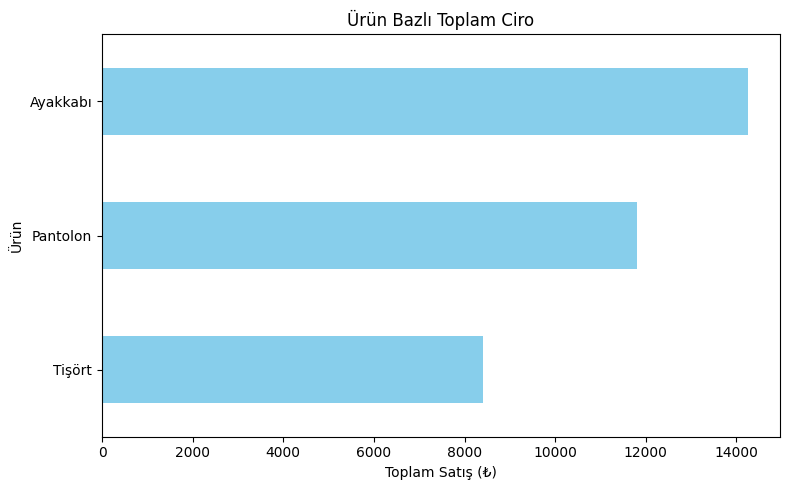

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ürün bazlı toplam satışları çizdirelim
plt.figure(figsize=(8,5))
df.groupby("Urun")["Toplam"].sum().sort_values().plot(kind="barh", color="skyblue")
plt.title("Ürün Bazlı Toplam Ciro")
plt.xlabel("Toplam Satış (₺)")
plt.ylabel("Ürün")
plt.tight_layout()
plt.show()


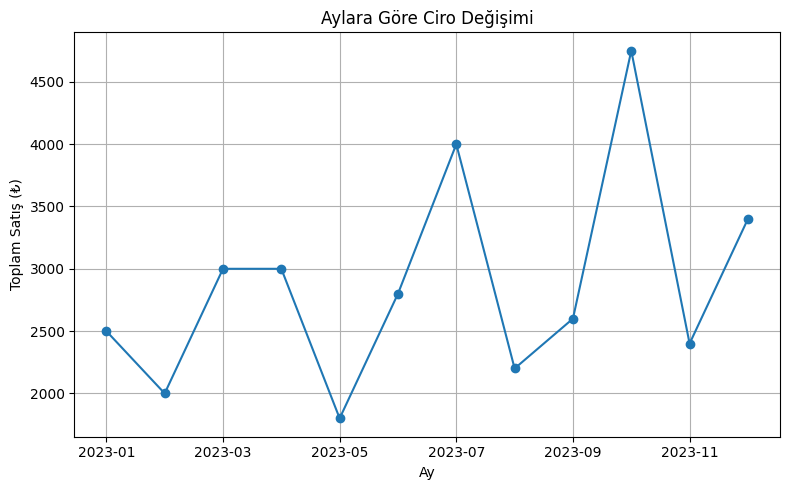

In [7]:
# Ay bazında satışları çizdirelim
plt.figure(figsize=(8,5))
df.groupby("Ay")["Toplam"].sum().plot(marker="o", linestyle="-")
plt.title("Aylara Göre Ciro Değişimi")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış (₺)")
plt.grid(True)
plt.tight_layout()
plt.show()


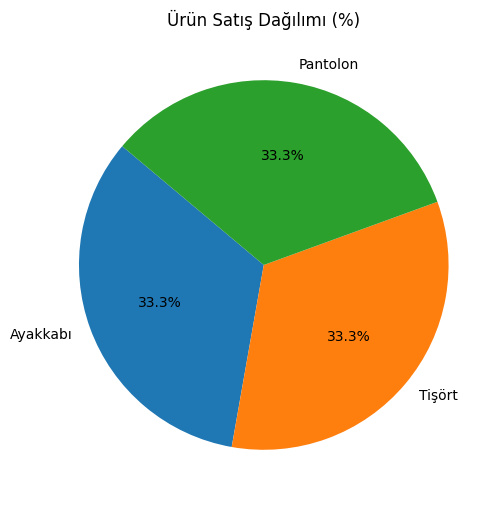

In [8]:
# Ürünlerin yüzde olarak dağılımı
plt.figure(figsize=(6,6))
df["Urun"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Ürün Satış Dağılımı (%)")
plt.ylabel("")
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
df["Ay_Sayi"] = range(1, len(df)+1)

# Ay bazlı toplam satış verisi
tahmin_df = df.groupby("Ay").agg({"Toplam": "sum"}).reset_index()
tahmin_df["Ay_Sayi"] = range(1, len(tahmin_df)+1)

# Giriş (X) ve hedef (y) verileri
X = tahmin_df[["Ay_Sayi"]]
y = tahmin_df["Toplam"]


In [11]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

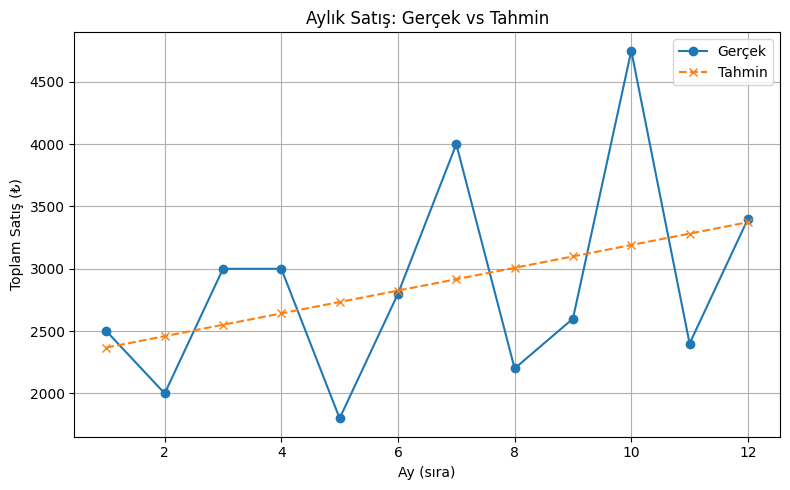

In [12]:
# Mevcut verilere göre tahmin alalım
tahmin_df["Tahmin"] = model.predict(X)

# Gerçek vs Tahmin grafiği
plt.figure(figsize=(8,5))
plt.plot(tahmin_df["Ay_Sayi"], tahmin_df["Toplam"], marker="o", label="Gerçek")
plt.plot(tahmin_df["Ay_Sayi"], tahmin_df["Tahmin"], marker="x", linestyle="--", label="Tahmin")
plt.title("Aylık Satış: Gerçek vs Tahmin")
plt.xlabel("Ay (sıra)")
plt.ylabel("Toplam Satış (₺)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Gelecek ay numarası
gelecek_ay = [[len(tahmin_df)+1]]

# Tahmin yap
tahmin = model.predict(gelecek_ay)[0]
print(f"Gelecek ay tahmini satış: {round(tahmin)} TL")


Gelecek ay tahmini satış: 3465 TL


In [14]:
df.to_csv("e_ticaret_satis.csv", index=False)
